In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Compare Sales by region for 2016 with 2015 using bar chart

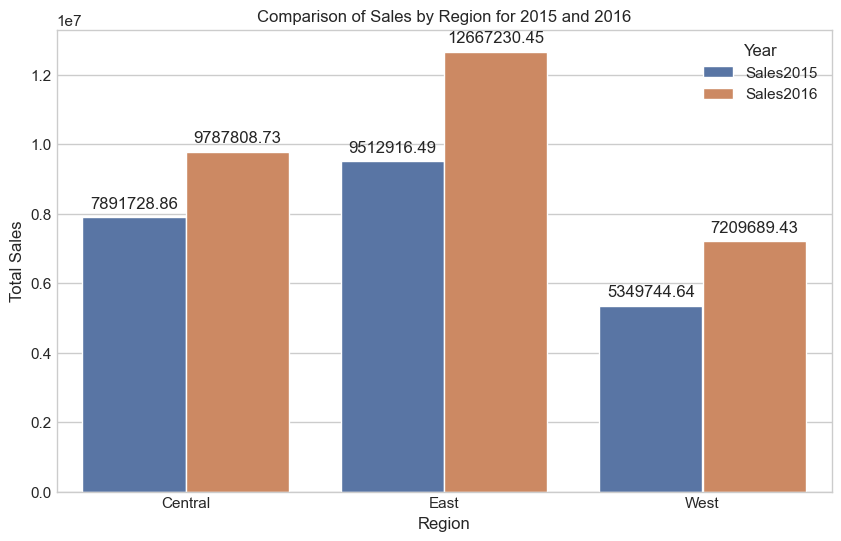

In [42]:
# load data
df=pd.read_csv("C:/Users/lenovo/Desktop/py/Case Study 4 - Python Visualizations Case Study/SalesData.csv")


#  Aggregate the Data
sales_by_region = df.groupby('Region')[['Sales2015', 'Sales2016']].sum()

#  Reshape the Data
sales_by_region_long = sales_by_region.stack().reset_index()
sales_by_region_long.columns = ['Region', 'Year', 'TotalSales']

#  Create the Bar Chart
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Region', y='TotalSales', hue='Year', data=sales_by_region_long)

# Add total sales on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Comparison of Sales by Region for 2015 and 2016')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()


# 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

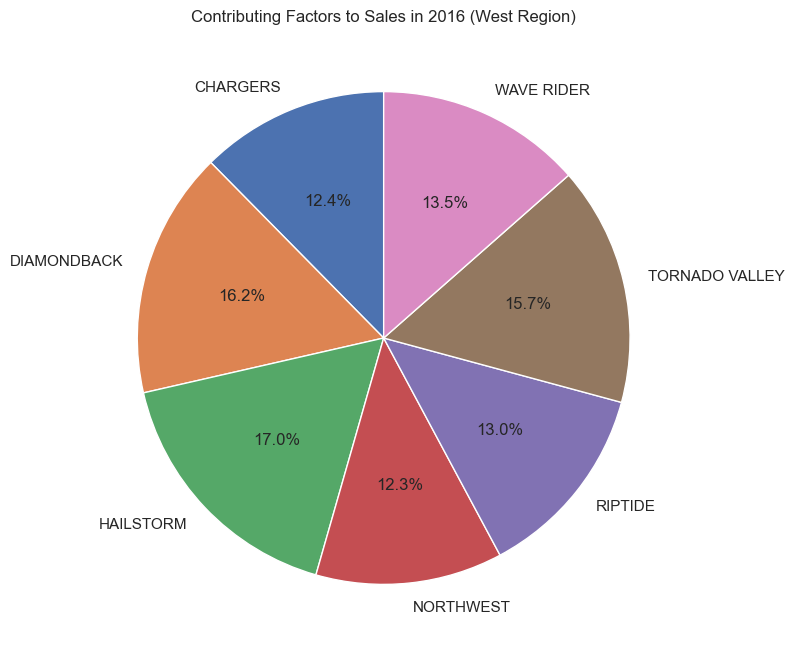

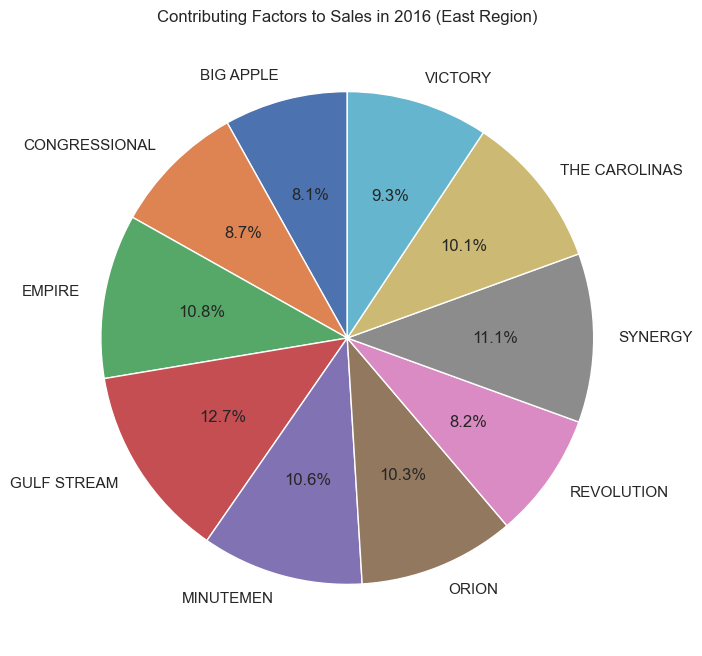

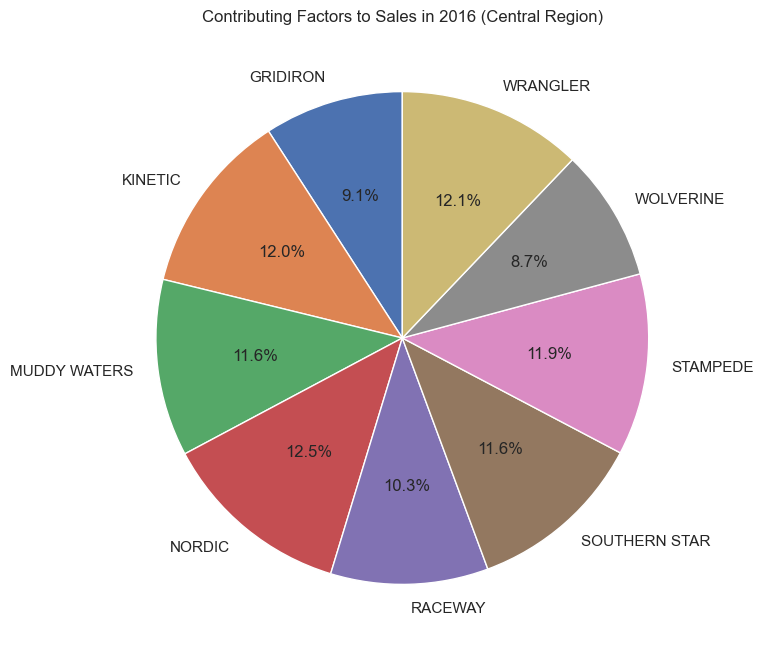

In [43]:
#For West region 
region_data = df[df['Region'] == 'West']

#  Group by 'Division' and calculate the total sales
sales_by_division = region_data.groupby('Division')['Sales2016'].sum()

#  Create a Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sales_by_division, labels=sales_by_division.index, autopct='%1.1f%%', startangle=90)
plt.title('Contributing Factors to Sales in 2016 (West Region)')
plt.show()

# for east region

region_data = df[df['Region'] == 'East']

#  Group by 'Division' and calculate the total sales
sales_by_division = region_data.groupby('Division')['Sales2016'].sum()

#  Create a Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sales_by_division, labels=sales_by_division.index, autopct='%1.1f%%', startangle=90)
plt.title('Contributing Factors to Sales in 2016 (East Region)')
plt.show()
region_data = df[df['Region'] == 'Central']


# for central region
# Group by 'Division' and calculate the total sales
sales_by_division = region_data.groupby('Division')['Sales2016'].sum()

#  Create a Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sales_by_division, labels=sales_by_division.index, autopct='%1.1f%%', startangle=90)
plt.title('Contributing Factors to Sales in 2016 (Central Region)')
plt.show()


# 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers


C:\Users\lenovo\AppData\Local\Temp\ipykernel_4604\3689223185.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(x='Region', y='TotalSales', hue='Tier', data=sales_by_region_tier_long, ci=None)


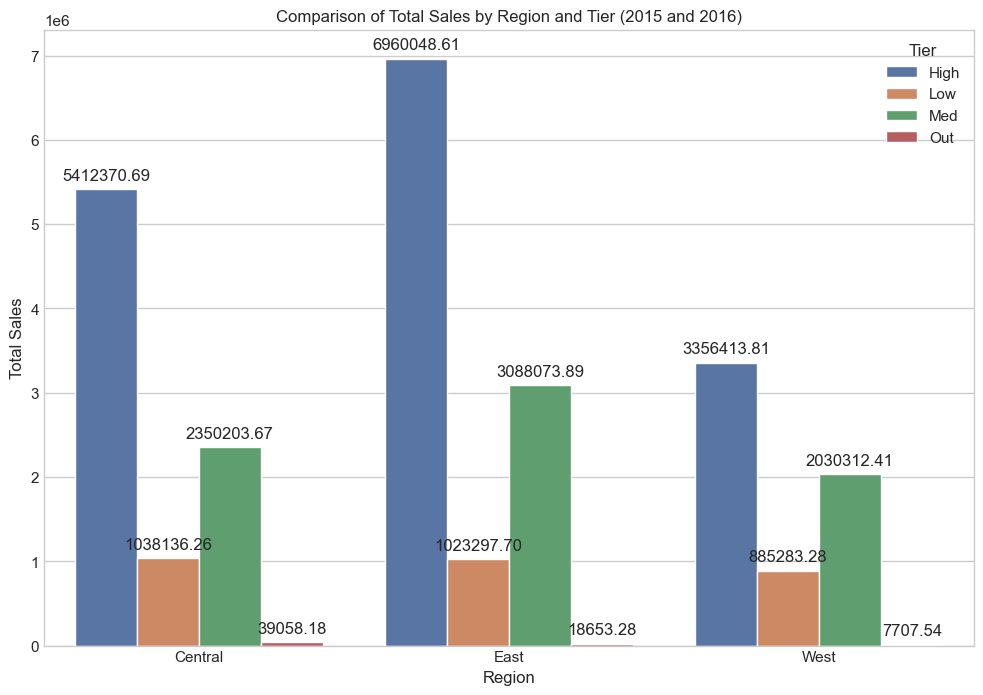

In [44]:

#  Group by 'Region' and 'Tier' and calculate the total sales for 2015 and 2016
sales_by_region_tier = df.groupby(['Region', 'Tier'])[['Sales2015', 'Sales2016']].sum().reset_index()

#  Reshape the data
sales_by_region_tier_long = sales_by_region_tier.melt(id_vars=['Region', 'Tier'], var_name='Year', value_name='TotalSales')

# Create the Bar Chart
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Region', y='TotalSales', hue='Tier', data=sales_by_region_tier_long, ci=None)

# Add total sales on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Comparison of Total Sales by Region and Tier (2015 and 2016)')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()


# 4. In East region, which state registered a decline in 2016 as compared to 2015?

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4604\240575583.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  east_region_data['SalesDifference'] = east_region_data['Sales2016'] - east_region_data['Sales2015']
C:\Users\lenovo\AppData\Local\Temp\ipykernel_4604\240575583.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(x='State', y='SalesDifference', data=decline_states, ci=None)


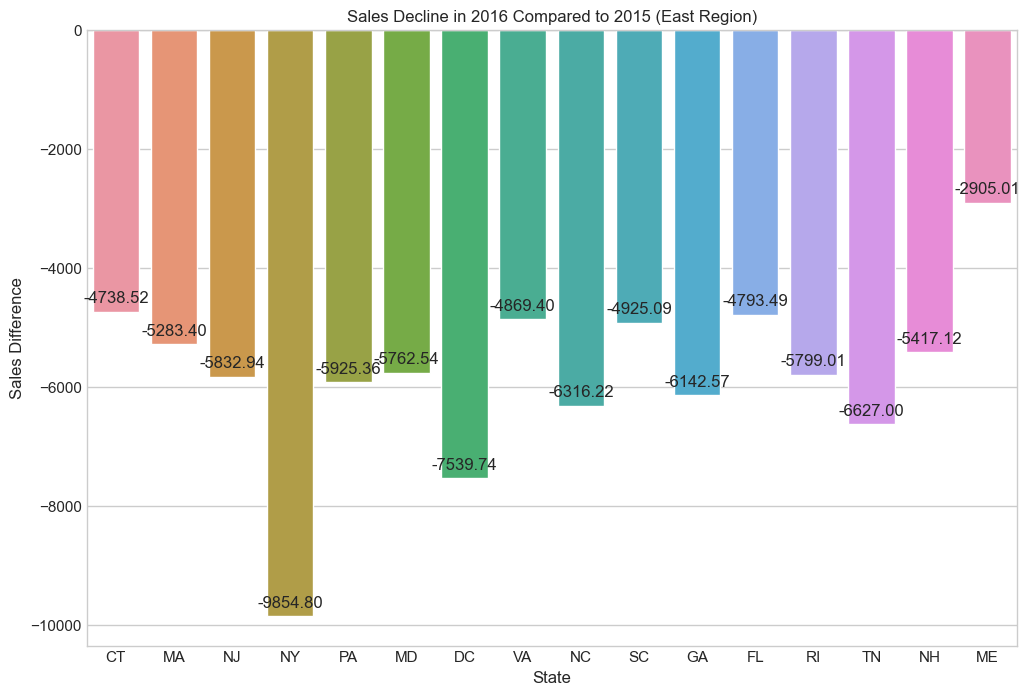

In [45]:

#  Filter data for the East region
east_region_data = df[df['Region'] == 'East']

#  Calculate the sales difference between 2016 and 2015 for each state
east_region_data['Sale
                 
                 sDifference'] = east_region_data['Sales2016'] - east_region_data['Sales2015']

#  Identify states with a decline in sales in 2016 compared to 2015
decline_states = east_region_data[east_region_data['SalesDifference'] < 0]

#  Create the Bar Chart
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='State', y='SalesDifference', data=decline_states, ci=None)

# Add sales difference on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Sales Decline in 2016 Compared to 2015 (East Region)')
plt.xlabel('State')
plt.ylabel('Sales Difference')
plt.show()


# 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4604\1082144411.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_tier_data['UnitsDifference'] = high_tier_data['Units2016'] - high_tier_data['Units2015']
C:\Users\lenovo\AppData\Local\Temp\ipykernel_4604\1082144411.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


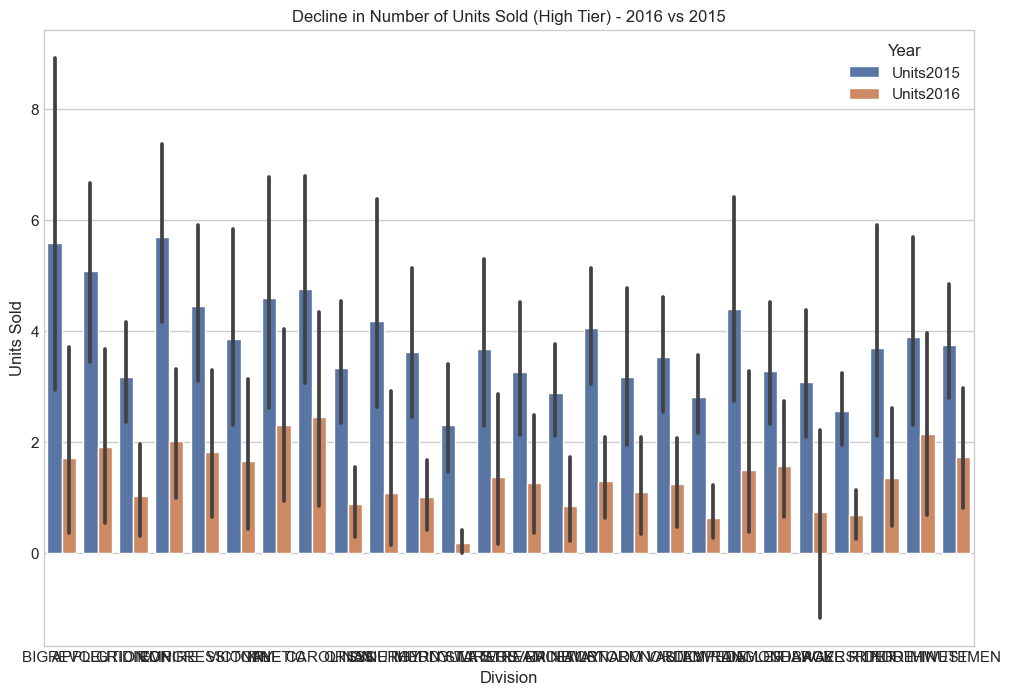

In [46]:


#  Filter data for the High tier
high_tier_data = df[df['Tier'] == 'High']

#  Calculate the units difference between 2016 and 2015 for each division
high_tier_data['UnitsDifference'] = high_tier_data['Units2016'] - high_tier_data['Units2015']

#  Filter divisions with a decline in units sold in 2016 compared to 2015
decline_divisions = high_tier_data[high_tier_data['UnitsDifference'] < 0]

#  Reshape the data (wide to long)
melted_data = pd.melt(decline_divisions, id_vars=['Division'], value_vars=['Units2015', 'Units2016'], var_name='Year', value_name='UnitsSold')

plt.figure(figsize=(12, 8))


plt.style.use('seaborn-whitegrid')


sns.barplot(x='Division', y='UnitsSold', hue='Year', data=melted_data)

plt.title('Decline in Number of Units Sold (High Tier) - 2016 vs 2015')
plt.xlabel('Division')
plt.ylabel('Units Sold')
plt.legend(title='Year')
plt.show()


# 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -• Jan - Mar : Q1• Apr - Jun : Q2• Jul - Sep : Q3• Oct - Dec : Q4

In [50]:
def map_to_quarter(month):
    if month in ['Jan', 'Feb', 'Mar']:
        return 'Q1'
    elif month in ['Apr', 'May', 'Jun']:
        return 'Q2'
    elif month in ['Jul', 'Aug', 'Sep']:
        return 'Q3'
    elif month in ['Oct', 'Nov', 'Dec']:
        return 'Q4'
    else:
        return None  


df['Qtr'] = df['Month'].apply(map_to_quarter)

df


,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14,Q1
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11,Q3
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55,Q4
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48,Q1


# 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

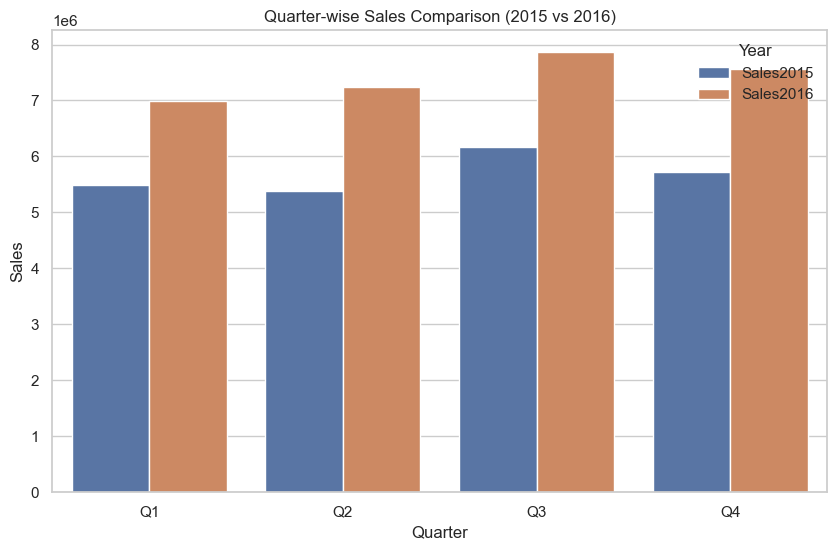

In [51]:

# Create a DataFrame for Qtr-wise sales in 2015 and 2016
qtr_sales = df.groupby(['Qtr'])[['Sales2015', 'Sales2016']].sum().reset_index()

# Melt the data for easier plotting
melted_data = pd.melt(qtr_sales, id_vars=['Qtr'], value_vars=['Sales2015', 'Sales2016'], var_name='Year', value_name='Sales')

# Create a bar plot
plt.figure(figsize=(10, 6))

# Set the figure style to whitegrid
sns.set(style="whitegrid")

#  bar chart
sns.barplot(x='Qtr', y='Sales', hue='Year', data=melted_data)
plt.title('Quarter-wise Sales Comparison (2015 vs 2016)')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.show()


# 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart

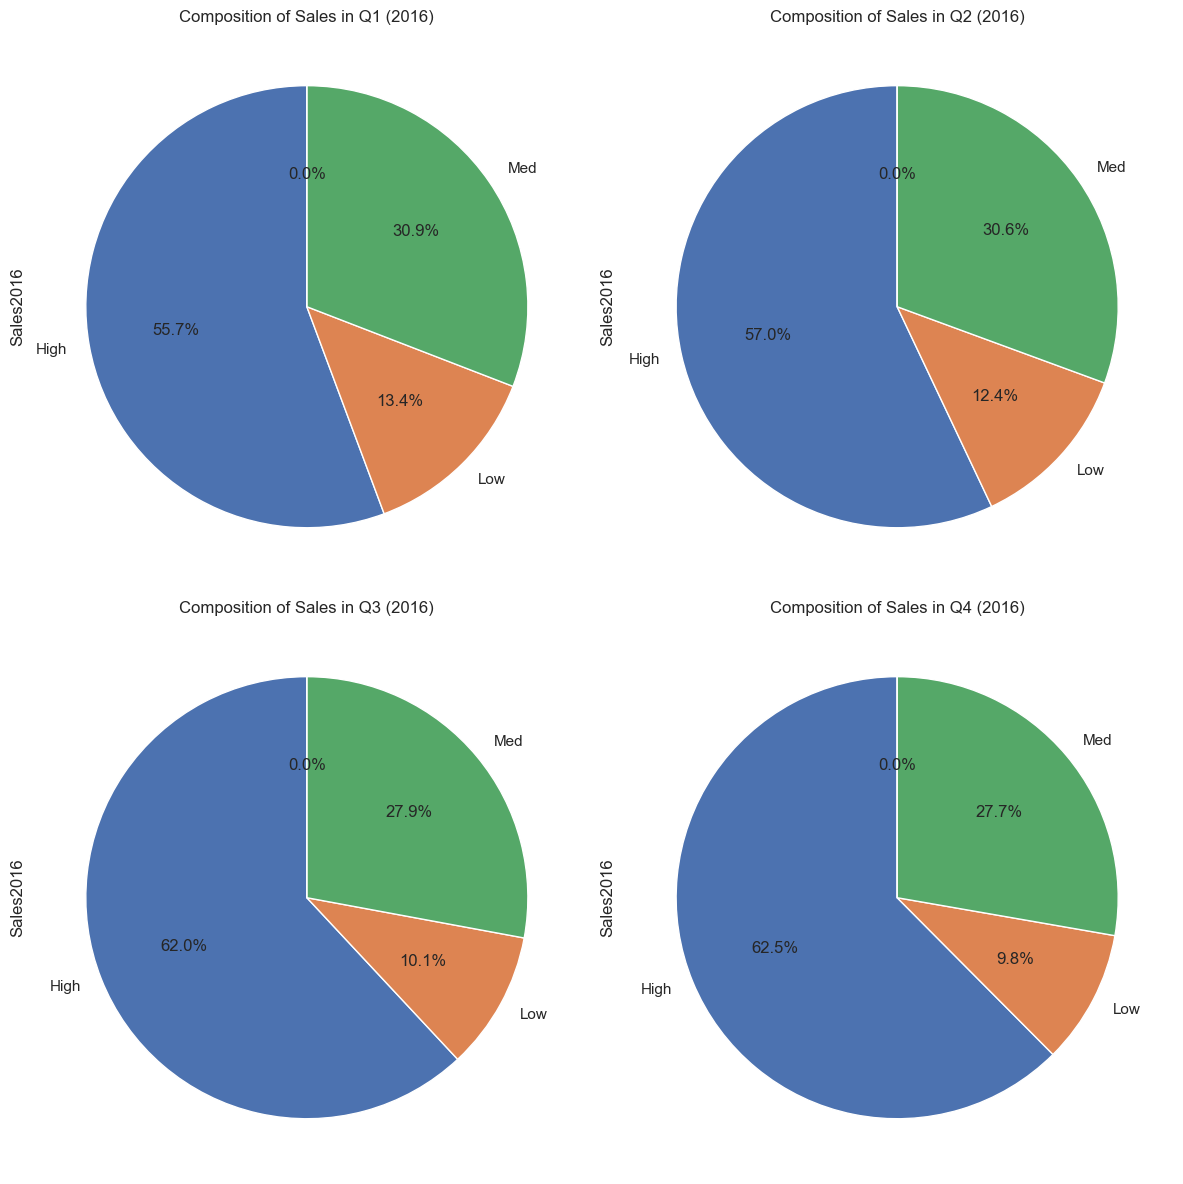

In [54]:
# Create subplots for each quarter
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
axes = axes.flatten()

# Iterate over each quarter
for i, qtr in enumerate(['Q1', 'Q2', 'Q3', 'Q4']):
    qtr_data = df[df['Qtr'] == qtr]

    # Filter out negative values in Sales2016
    qtr_data = qtr_data[qtr_data['Sales2016'] >= 0]

    # Group by Tier and sum the sales
    tier_sales = qtr_data.groupby('Tier')['Sales2016'].sum()

    # pie chart
    tier_sales.plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[i])
    axes[i].set_title(f'Composition of Sales in {qtr} (2016)')
plt.tight_layout()
plt.show()
